# Test Setup for Transient Analysis

In [1]:
from CircuitCalculator.Circuit.solution import DCSolution
from CircuitCalculator.Circuit.circuit import Circuit, transform_circuit
from CircuitCalculator.Circuit import components as cmp

In [2]:
# G1, G2, G3 = 10, 20, 30
# R1, R2, R3 = 1/G1, 1/G2, 1/G3
U0 = 1
R1, R2 = 10, 20
G1, G2 = 1/R1, 1/R2
RC = 40e6
C1 = 5e-3
C2 = 1e-3
circuit = Circuit([
    cmp.dc_voltage_source(id='Uq', V=U0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.capacitor(id='C1', C=C1, nodes=('2', '3')),
    cmp.resistor(id='R2', R=R2, nodes=('3', '0')),
    cmp.capacitor(id='C2', C=C2, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])
solution = DCSolution(circuit)

## Funktion zur Berechnung der State Space Matrizen

In [3]:
from CircuitCalculator.Circuit.state_space_model import StateSpaceModel
ss = StateSpaceModel(circuit=circuit)


ImportError: cannot import name 'create_state_space_input_update_matrix' from 'CircuitCalculator.Network.NodalAnalysis.state_space_model' (/Users/chris/Workspace/CircuitCalculator/src/CircuitCalculator/Network/NodalAnalysis/state_space_model.py)

In [ ]:
from scipy import signal
import numpy as np

sys = signal.StateSpace(ss.A, ss.B, np.array([0, 1]), 0)
# sys = signal.StateSpace(np.array([[-1/R1/C1, -1/R1/C1], [-1/R1/C2, -(R1+R2)/R1/R2/C2]]), np.array([[1/R1/C1], [1/R1/C2]]), np.array([0, 1]), 0)


In [ ]:
t = np.arange(0, 0.5, 0.0003)
U = U0*np.array(t > 0.1, dtype=float)

tout, yout, xout = signal.lsim(sys, U, t)

In [ ]:
def quad_equation(a, b, c):
    D = np.sqrt(b**2-4*a*c)
    return ((-b+D)/2/a, (-b-D)/2/a)

a = C2*R2
b = C1*R1
c = C1*R2
d, e = quad_equation(1, (a+b+c)/a/b, 1/a/b)

u_ref = np.zeros(t.size)
t_ref = tout[t>0.1]-0.1
u_ref[t>0.1] = U0/a/b * (1/d/e + 1/(e-d)*(-1/d*np.exp(d*t_ref)+1/e*np.exp(e*t_ref))) + U0/b * 1/(d-e) * (np.exp(d*t_ref)-np.exp(e*t_ref))


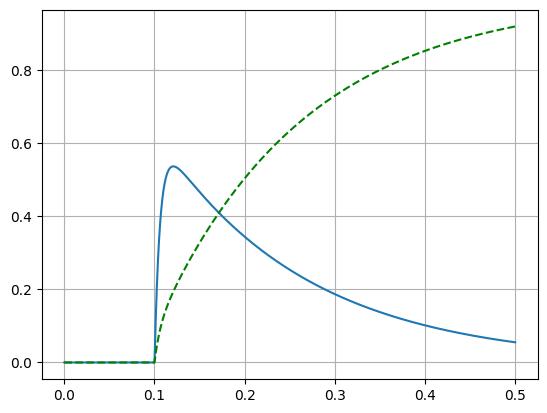

In [ ]:
import matplotlib.pyplot as plt

plt.plot(tout, yout)
# plt.plot((tout[0], tout[-1]), (solution.get_voltage('C'), solution.get_voltage('C')))
plt.plot(tout, u_ref, 'g--')
plt.grid(True)
